In [15]:
import numpy as np
import networkx as nx
from networkx.algorithms import tournament

from itertools import product
import matplotlib.pyplot as plt

In [39]:
G = nx.DiGraph()

In [40]:
vertices = np.arange(1,20)
vertices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [41]:
for _ in range(40):
    u, v = np.random.choice(vertices), np.random.choice(vertices)
    if u != v:
        w = np.random.randint(10)+1
        #print((u,v, w))
        G.add_edge(u,v, weight=w)

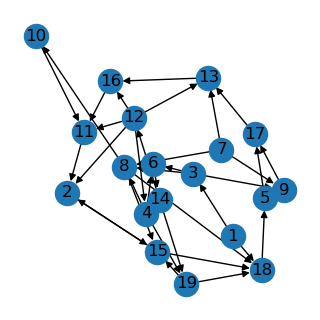

In [42]:
plt.figure(figsize=(3,3))
pos = nx.circular_layout(G) 
#pos=nx.get_node_attributes(G,'pos')
nx.draw(G, with_labels = True)
#labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#nx.draw(G,with_labels = True)
plt.show()

In [43]:
S = [1,2,3,4]

In [44]:
G2 = nx.DiGraph()
for idx in range(len(S)):
    s = S[idx]
    temp = S.copy()
    temp.pop(idx)
    for t in temp:
        try:
            w = nx.shortest_path_length(G, source=s, target=t, weight='weight')
            #G2.add_edge(s,t, weight=w)
        except nx.NetworkXNoPath:
            w = 1000
        print(s,t,f'-->{w}')
        G2.add_edge(s,t, weight=w)

1 2 -->17
1 3 -->3
1 4 -->24
2 1 -->1000
2 3 -->1000
2 4 -->1000
3 1 -->1000
3 2 -->14
3 4 -->21
4 1 -->1000
4 2 -->17
4 3 -->1000


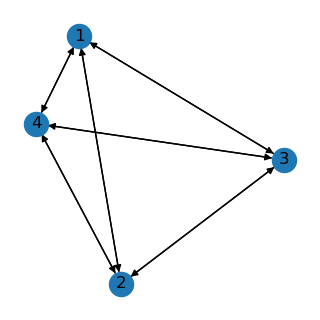

{(1, 2): 17,
 (1, 3): 3,
 (1, 4): 24,
 (2, 1): 1000,
 (2, 3): 1000,
 (2, 4): 1000,
 (3, 1): 1000,
 (3, 2): 14,
 (3, 4): 21,
 (4, 1): 1000,
 (4, 2): 17,
 (4, 3): 1000}

In [45]:
plt.figure(figsize=(3,3))
pos = nx.circular_layout(G2) 
pos = nx.get_node_attributes(G2,'pos')
nx.draw(G2, with_labels = True)
labels = nx.get_edge_attributes(G2,'weight')
#nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.show()
labels

In [46]:
hp = tournament.hamiltonian_path(G2)
hp

[4, 3, 2, 1]

In [47]:
for i in range(len(hp)-1):
    e = (hp[i],hp[i+1])
    l = labels[e]
    print(f'w{e} = {l}')

w(4, 3) = 1000
w(3, 2) = 14
w(2, 1) = 1000


In [62]:
tsp_cycle = nx.approximation.simulated_annealing_tsp(G2, "greedy", weight='weight', temp=500)
print(tsp_path)

[1, 3, 4, 2, 1]


In [64]:
tsp = nx.approximation.traveling_salesman_problem
SA_tsp = nx.approximation.simulated_annealing_tsp
method = lambda G2, wt: SA_tsp(G2, "greedy", weight=wt, temp=500)
tsp_path = tsp(G2, cycle=False, method=method)
tsp_path

[1, 3, 4, 2]

In [65]:
for i in range(len(tsp_path)-1):
    e = (tsp_path[i],tsp_path[i+1])
    l = labels[e]
    print(f'w{e} = {l}')

w(1, 3) = 3
w(3, 4) = 21
w(4, 2) = 17
